# Plot model fits for simulation analysis 1

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from psifr import fr
from mindstorm import statplot
from cymr import cmr
from dcmr import framework
from dcmr import figures

res_dir = Path(os.environ['CFR_RESULTS'])
fit_dir = Path(os.environ['CFR_FITS']) / 'merge'
fig_dir = Path(os.environ['CFR_FIGURES']) / 'sim1'

data_file = res_dir / 'cfr_data.csv'
patterns_file = res_dir / 'cfr_patterns.hdf5'
os.makedirs(fig_dir, exist_ok=True)
figures.set_style()

## Read observed and simulated data

In [2]:
patterns = cmr.load_patterns(patterns_file)
rsm = patterns['similarity']['use']

In [3]:
included_models = ['I', 'C', 'D', 'IC', 'ID', 'CD', 'ICD']
models, model_names = framework.get_sim_models('cfr2', 'set1', included=included_models)
data = framework.read_model_sims(data_file, fit_dir, models, model_names)

In [4]:
data.head()

subject  list                   item  input  output  study  \
source trial                                                               
I      0            1     2              SEAN PENN      1    <NA>   True   
       1            1     2         AUDREY HEPBURN      2       9   True   
       2            1     2  ST PATRICKS CATHEDRAL      3    <NA>   True   
       3            1     2          LES INVALIDES      4    <NA>   True   
       4            1     2   GREAT ZIMBABWE RUINS      5    <NA>   True   

              recall  repeat  intrusion  session  ... item_index category  \
source trial                                      ...                       
I      0       False       0      False        1  ...        228      cel   
       1        True       0      False        1  ...         19      cel   
       2       False       0      False        1  ...        463      loc   
       3       False       0      False        1  ...        364      loc   
       4       False       0      False        1  ...        340      loc   

              block n_block  block_pos  block_len  curr  prev next  base  
source trial                                                              
I      0          1       6          1          2   cel  <NA>  loc  <NA>  
       1          1       6          2          2   cel  <NA>  loc  <NA>  
       2          2       6          1          4   loc   cel  obj   obj  
       3          2       6          2          4   loc   cel  obj   obj  
       4          2       6          3          4   loc   cel  obj   obj  

[5 rows x 22 columns]

## Set plotting parameters

In [5]:
curve = sns.color_palette(
    'ch:rot=-.5, light=.6, dark=.3, gamma=1', n_colors=len(models)
)
curve.insert(len(models), (.3, .3, .3))
curve

[(0.44163916703794076, 0.6914342033666265, 0.5414714890673176),
 (0.37680333890180306, 0.6421749281286224, 0.5190472356270401),
 (0.3237814498768263, 0.5927867044161492, 0.5007454824917508),
 (0.27424883716016524, 0.5352555384607786, 0.4809527643729599),
 (0.2328219480554011, 0.4740934551530011, 0.4585285109326825),
 (0.19871588360752257, 0.4101766194959508, 0.43091390277159347),
 (0.17051215858853222, 0.344636926092434, 0.3959064384004337),
 (0.3, 0.3, 0.3)]

In [6]:
dark = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.6', n_colors=len(models)
)
dark.insert(len(models), (.6, .6, .6))
dark

[(0.725301473503126, 0.8645990769601404, 0.7363315007817791),
 (0.6482301081514271, 0.8304114686677412, 0.7026336329579609),
 (0.5726480212561199, 0.7903330615780247, 0.6781127074715647),
 (0.49769124779560403, 0.7396109923554344, 0.6592940288312491),
 (0.434142969265212, 0.6825746803726097, 0.6442133332843847),
 (0.3788481069708822, 0.6159013359528693, 0.6266339293213777),
 (0.33145894574681245, 0.5393097642399239, 0.6005096167923277),
 (0.6, 0.6, 0.6)]

In [7]:
light = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.2', n_colors=len(models)
)
light.insert(len(models), (.85, .85, .85))
light

[(0.8973525746116884, 0.9546730560357413, 0.901891392639006),
 (0.8637400637238504, 0.9432473293594108, 0.8874827533494256),
 (0.8280152843984974, 0.9293987580038842, 0.8771338467738101),
 (0.7891039444527563, 0.9108297736038378, 0.8704169954006072),
 (0.7524272591968628, 0.8882868851933822, 0.8673082498778775),
 (0.7166514659590271, 0.8594380668180563, 0.8659027352474745),
 (0.6820851323976215, 0.8225675908928259, 0.8639314200489312),
 (0.85, 0.85, 0.85)]

In [8]:
figsize = (6.5, 3.5)
bar_kws = {'capsize': 0.6}
point_kws = {'size': 5}

## Clustering for all models

In [9]:
lag_rank_within = data.groupby('source', sort=False).apply(
    fr.lag_rank, test_key='category', test=lambda x, y: x == y
)

In [10]:
lag_rank_within

subject      rank
source                      
I      0         1  0.704551
       1         2  0.705365
       2         3  0.669715
       3         5  0.692301
       4         8  0.658421
...            ...       ...
Data   24       42  0.614276
       25       43  0.580372
       26       44  0.600772
       27       45  0.634144
       28       46  0.697734

[232 rows x 2 columns]

LINO NOT subset; don't know how to subset; dropped


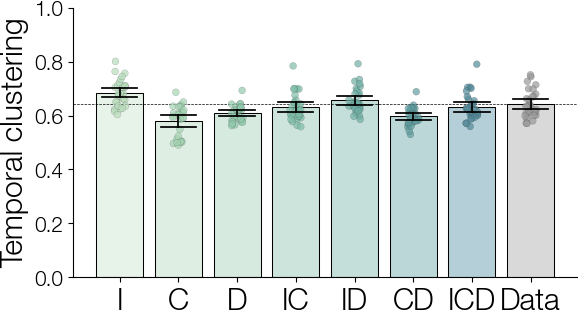

In [11]:
fig, ax = plt.subplots(figsize=figsize)
statplot.plot_swarm_bar(
    lag_rank_within,
    x='source',
    hue='source',
    y='rank',
    dark=dark,
    light=light,
    point_kind='strip',
    bar_kws=bar_kws,
    point_kws=point_kws,
    ax=ax,
)
m = lag_rank_within.loc['Data', 'rank'].mean()
ax.axline([0, m], slope=0, linestyle='--', linewidth=.5, color='k')
ax.set(ylim=(0, 1), ylabel='Temporal clustering');
fig.savefig(fig_dir / 'comp_lag_rank.pdf')

In [12]:
cat_crp = data.groupby('source', sort=False).apply(
    fr.category_crp, category_key='category'
)

LINO NOT subset; don't know how to subset; dropped


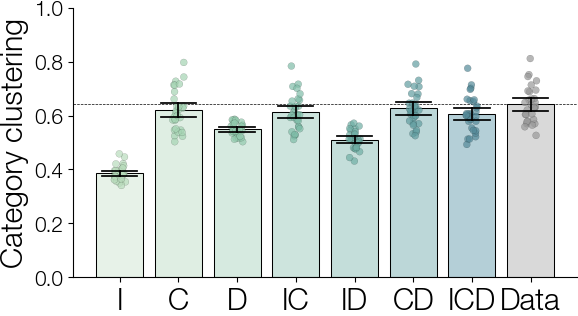

In [13]:
fig, ax = plt.subplots(figsize=figsize)
statplot.plot_swarm_bar(
    cat_crp,
    x='source',
    hue='source',
    y='prob',
    dark=dark,
    light=light,
    point_kind='strip',
    bar_kws=bar_kws,
    point_kws=point_kws,
    ax=ax,
)
m = cat_crp.loc['Data', 'prob'].mean()
ax.axline([0, m], slope=0, linestyle='--', linewidth=.5, color='k')
ax.set(ylim=(0, 1), ylabel='Category clustering');
fig.savefig(fig_dir / 'comp_cat_crp.pdf')

In [14]:
use_rank = data.groupby('source', sort=False).apply(
    fr.distance_rank, 'item_index', 1 - rsm, test_key='category',
    test=lambda x, y: x == y
)

LINO NOT subset; don't know how to subset; dropped


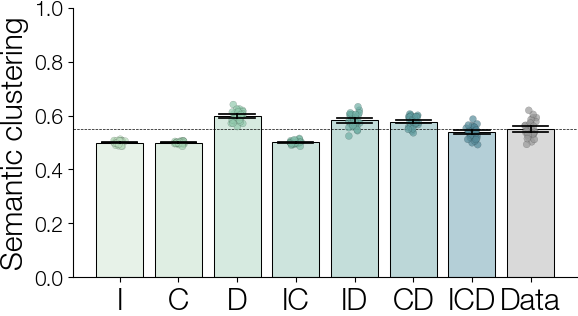

In [15]:
fig, ax = plt.subplots(figsize=figsize)
statplot.plot_swarm_bar(
    use_rank,
    x='source',
    hue='source',
    y='rank',
    dark=dark,
    light=light,
    point_kind='strip',
    bar_kws=bar_kws,
    point_kws=point_kws,
    ax=ax,
)
m = use_rank.loc['Data', 'rank'].mean()
ax.axline([0, m], slope=0, linestyle='--', linewidth=.5, color='k')
ax.set(ylim=(0, 1), ylabel='Semantic clustering');
fig.savefig(fig_dir / 'comp_use_rank.pdf')

## Curves for all models

In [16]:
opt = {'col_wrap': 4, 'height': 3, 'palette': curve}

In [17]:
spc = data.groupby('source', sort=False).apply(fr.spc)

In [18]:
spc

subject  input    recall
source                              
I      0          1      1  0.408667
       1          1      2  0.446667
       2          1      3  0.421333
       3          1      4  0.408667
       4          1      5  0.434667
...             ...    ...       ...
Data   691       46     20  0.800000
       692       46     21  0.633333
       693       46     22  0.666667
       694       46     23  0.833333
       695       46     24  1.000000

[5568 rows x 3 columns]

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


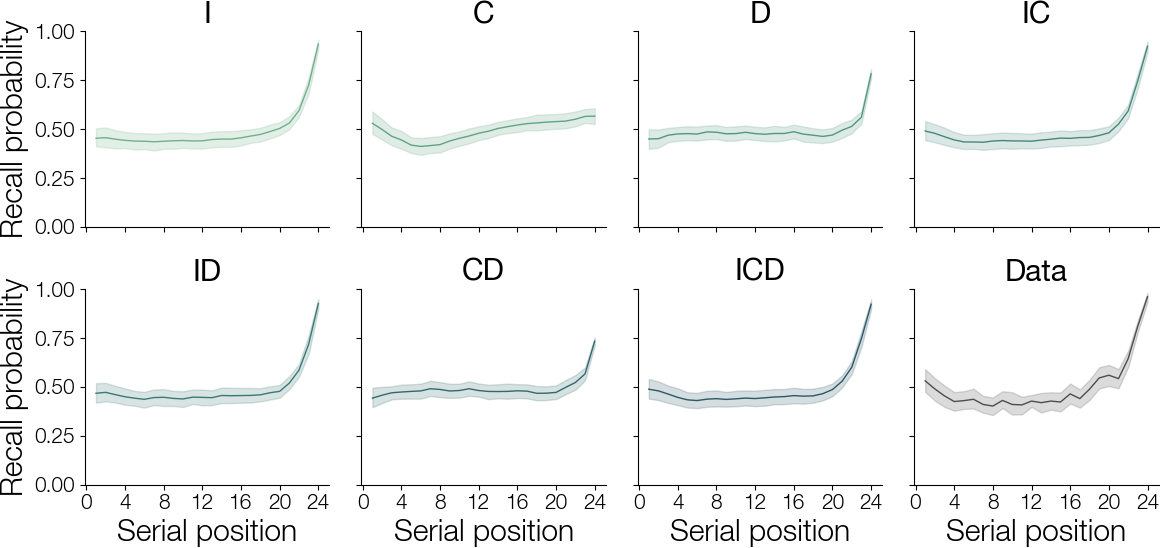

In [19]:
g = figures.plot_spc_hue(spc, col='source', hue='source', **opt)
g.set_titles('{col_name}')
g.set(xticks=(0, 4, 8, 12, 16, 20, 24))
g.savefig(fig_dir / 'spc.pdf')

In [20]:
pfr = data.groupby('source', sort=False).apply(lambda x: fr.pnr(x).query('output == 1'))

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


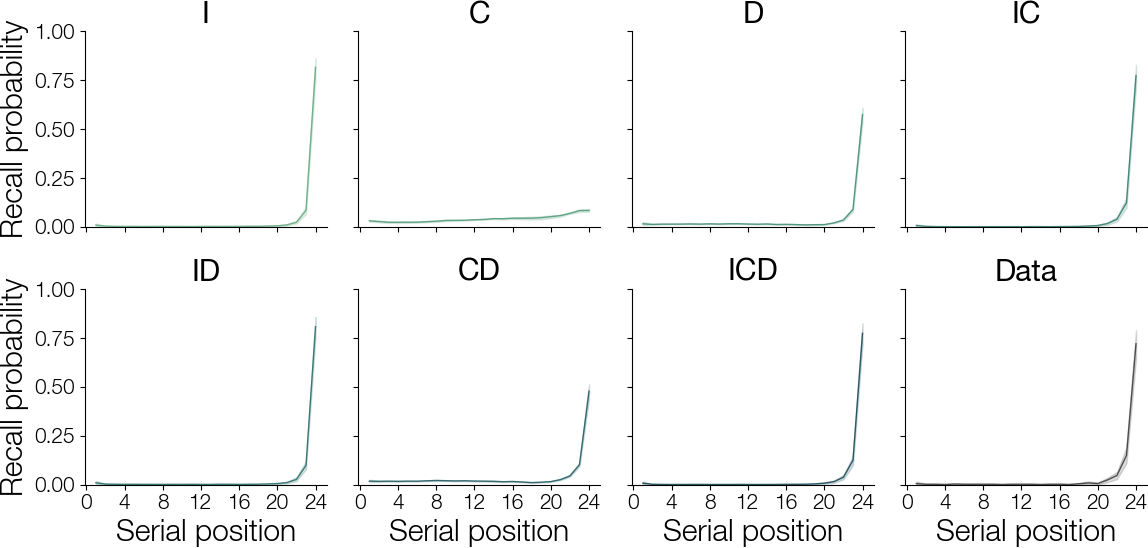

In [21]:
g = figures.plot_spc_hue(pfr, col='source', hue='source', **opt)
g.set_titles('{col_name}')
g.set(xticks=(0, 4, 8, 12, 16, 20, 24))
g.savefig(fig_dir / 'pfr.pdf')

In [22]:
crp = data.groupby('source', sort=False).apply(
    fr.lag_crp, test_key='category', test=lambda x, y: x == y
)

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


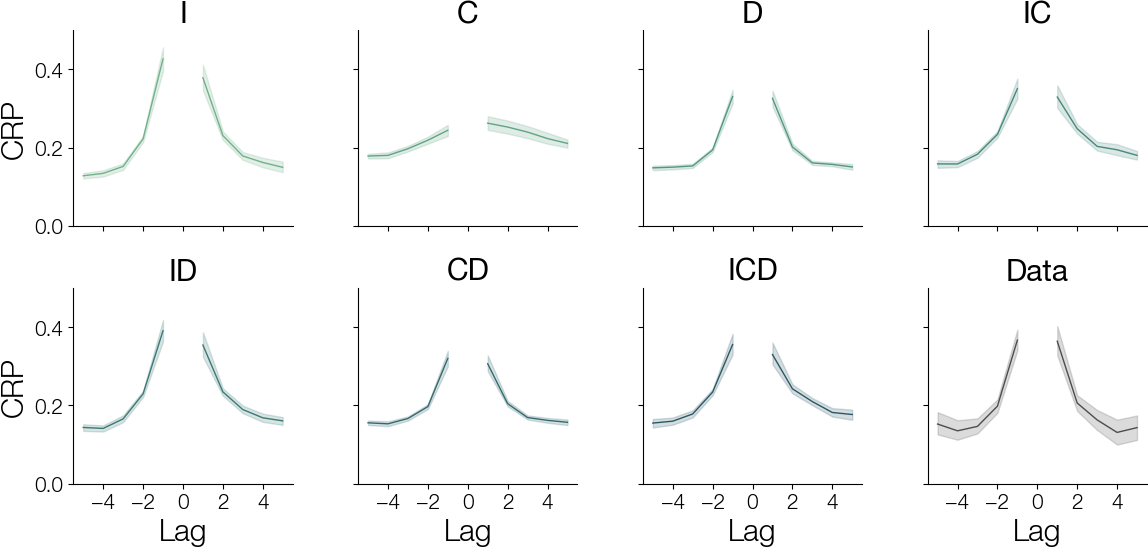

In [23]:
g = figures.plot_lag_crp_hue(crp, col='source', hue='source', **opt)
g.set_titles('{col_name}')
g.set(ylim=(0, 0.5), xticks=[-4, -2, 0, 2, 4])
g.savefig(fig_dir / 'lag_crp.pdf')

In [24]:
edges = np.linspace(.05, .95, 10)
min_samples=5

dcrp_within = data.groupby('source', sort=False).apply(
    fr.distance_crp, 'item_index', rsm, edges, 
    test_key='category', test=lambda x, y: x == y
)

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


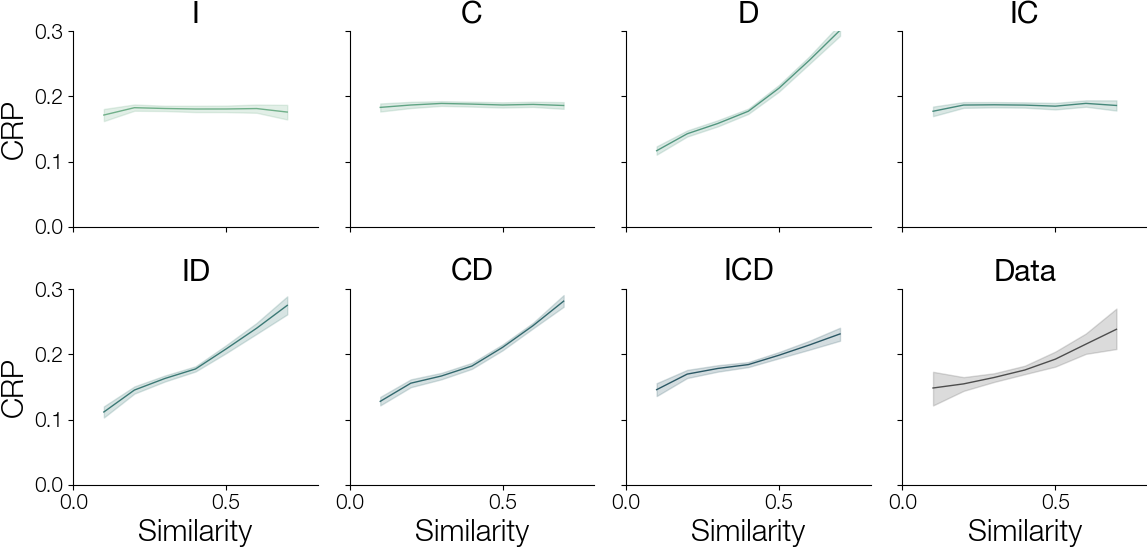

In [25]:
g = figures.plot_distance_crp_hue(
    dcrp_within, min_samples=min_samples, col='source', hue='source', **opt
)
g.set_titles('{col_name}')
g.set(xlim=(0, .8), ylim=(0, .3), xlabel='Similarity')
g.savefig(fig_dir / 'use_crp_within.pdf')

In [26]:
dcrp_across = data.groupby('source', sort=False).apply(
    fr.distance_crp, 'item_index', rsm, edges, 
    test_key='category', test=lambda x, y: x != y
)

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


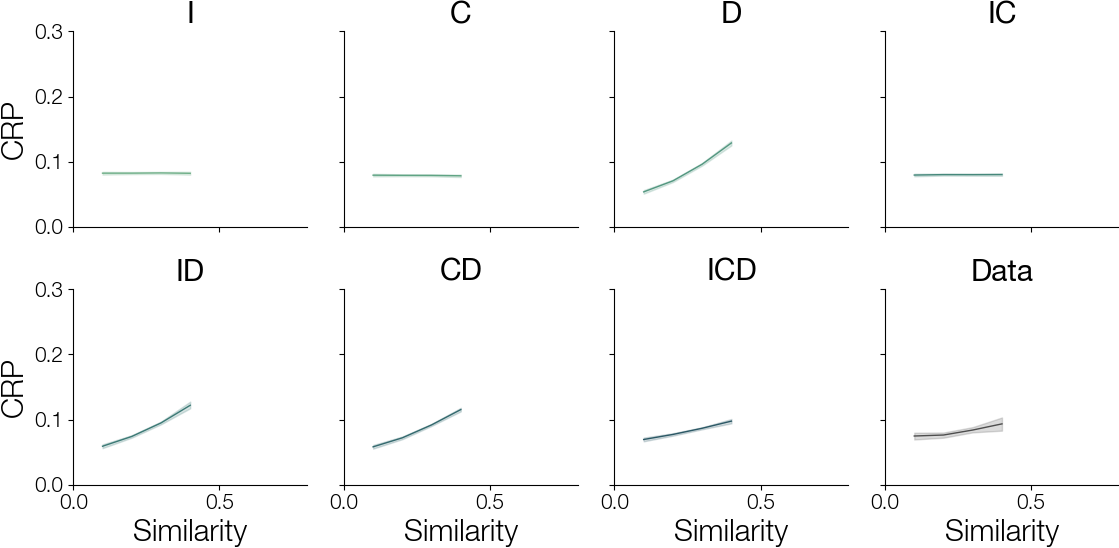

In [27]:
g = figures.plot_distance_crp_hue(
    dcrp_across, min_samples=min_samples, col='source', hue='source', **opt
)
g.set_titles('{col_name}')
g.set(xlim=(0, .8), ylim=(0, .3), xlabel='Similarity')
g.savefig(fig_dir / 'use_crp_across.pdf')

In [28]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.5.0

numpy     : 2.1.3
cymr      : 0.14.3
matplotlib: 3.10.5
psifr     : 0.10.1
pandas    : 2.3.2
seaborn   : 0.13.2
mindstorm : 0.11.2
dcmr      : 1.0.0a0

